# Sistemas Inteligentes para Bioinformática

Exemplos de validação de código. Deverá corrigir os imports e diretórios de acordo com a sua implementação.

In [1]:
import pandas as pd
from si.data import Dataset
from si.util.util import summary
from si.util.scale import StandardScaler #Standard Scale
from si.data.feature_selection import f_regression, SelectKBest, VarianceThreshold #Feature Selection
from si.unsupervised.Clustering import Kmeans #Clustering
import matplotlib.pyplot as plt
from si.unsupervised.Clustering import PCA #PCA
import os

In [2]:
DIR = os.path.dirname(os.path.realpath('.'))
filename = os.path.join(DIR, 'potential-sniffle/datasets/breast-bin.data')

## Labeled dataset

In [3]:
dataset = Dataset.from_data(filename, labeled = True)

In [4]:
dataset.X[:5, :]

array([[8., 4., 4., 1., 2., 9., 3., 3., 1.],
       [5., 1., 1., 3., 2., 1., 1., 1., 1.],
       [2., 1., 1., 1., 3., 1., 2., 1., 1.],
       [2., 1., 1., 1., 2., 1., 3., 1., 1.],
       [9., 5., 8., 1., 2., 3., 2., 1., 5.]])

In [5]:
dataset.Y[:5]

array([1., 0., 0., 0., 1.])

In [6]:
print("Has label:", dataset.hasLabel())
print("Number of features:", dataset.getNumFeatures())
print("Number of classes:", dataset.getNumClasses())
summary(dataset)

Has label: True
Number of features: None
Number of classes: 2


,A,B,C,D,E,F,G,H,I,Y
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,0.344778
var,7.917053,9.298082,8.819630,8.141527,4.896110,13.099601,5.937114,9.311340,2.937284,0.225906
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [7]:
dataset.toDataframe()

,A,B,C,D,E,F,G,H,I,Y
0,8.0,4.0,4.0,1.0,2.0,9.0,3.0,3.0,1.0,1.0
1,5.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,0.0
2,2.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,0.0
3,2.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,0.0
4,9.0,5.0,8.0,1.0,2.0,3.0,2.0,1.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...
694,1.0,1.0,1.0,1.0,4.0,3.0,1.0,1.0,1.0,0.0
695,5.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,0.0
696,5.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0
697,2.0,3.0,2.0,2.0,2.0,2.0,3.0,1.0,1.0,0.0


## Standard Scaler

In [8]:
sc = StandardScaler()
ds2 = sc.fit_transform(dataset)
summary(ds2)

,A,B,C,D,E,F,G,H,I,Y
mean,-5.034917e-17,2.361805e-16,1.224581e-16,2.816059e-16,2.681054e-16,-6.480272e-16,4.034287e-17,-2.642934e-16,-7.290306e-17,0.344778
var,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.225906
max,1.983939e+00,2.251526e+00,2.287222e+00,2.520955e+00,3.065906e+00,1.799664e+00,2.693171e+00,2.337594e+00,4.907421e+00,1.000000
min,-1.214667e+00,-6.999951e-01,-7.432990e-01,-6.332472e-01,-1.001495e+00,-6.869792e-01,-1.000471e+00,-6.118250e-01,-3.439118e-01,0.000000


# Feature Selection

## Variance Threshold

In [9]:
vt = VarianceThreshold(8)
ds2 = vt.fit_transform(dataset)
summary(ds2)

,B,C,D,F,H,Y
mean,3.134478,3.207439,2.806867,3.486409,2.866953,0.344778
var,9.298082,8.819630,8.141527,13.099601,9.311340,0.225906
max,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


## SelectKBest

In [10]:
# SelectKBest for classification
skb = SelectKBest(5)
ds3 = skb.fit_transform(dataset)
summary(ds3)


,A,G,B,C,F,Y
mean,4.417740,3.437768,3.134478,3.207439,3.486409,0.344778
var,7.917053,5.937114,9.298082,8.819630,13.099601,0.225906
max,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


# Clustering

In [11]:
# o dataset iris nao estava inicialmente no github
filename = os.path.join(DIR, 'potential-sniffle/datasets/iris.data')
df = pd.read_csv(filename)
iris = Dataset.from_dataframe(df, ylabel = "class")

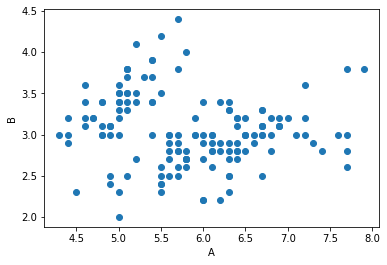

In [12]:
# indice das features para o plot
c1 = 0
c2 = 1
# plot
plt.scatter(iris.X.iloc[:,c1], iris.X.iloc[:,c2])
plt.xlabel(iris._xnames[c1])
plt.ylabel(iris._xnames[c2])
plt.show()

In [13]:
kmeans = Kmeans(3)
cent, clust = kmeans.fit_transform(iris)

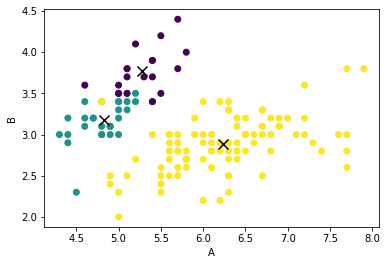

In [14]:

plt.scatter(iris.X.iloc[:,c1], iris.X.iloc[:,c2], c = clust)
plt.scatter(cent[:,c1],cent[:,c2], s = 100, c = 'black', marker = 'x')
plt.xlabel(iris._xnames[c1])
plt.ylabel(iris._xnames[c2])
plt.show()

# PCA

In [15]:
pca = PCA(2, method = 'svd')

In [16]:
reduced = pca.fit_transform(iris)
print(pca.variance_transform())

[ 4.49542143 12.02085822 30.05643531 53.42728505]


In [17]:
iris_pca = Dataset(reduced[0], iris.Y, xnames = ['pc1', 'pc2'], yname = 'class')
iris_pca.toDataframe()

,pc1,pc2,class
0,0.023073,0.121943,Iris-setosa
1,0.103208,0.227251,Iris-setosa
2,0.027825,-0.05148,Iris-setosa
3,-0.066311,-0.09886,Iris-setosa
4,-0.037397,-0.021428,Iris-setosa
...,...,...,...
145,0.38889,-0.254532,Iris-virginica
146,0.221322,0.025382,Iris-virginica
147,0.118903,-0.179277,Iris-virginica
148,0.024146,-0.931405,Iris-virginica


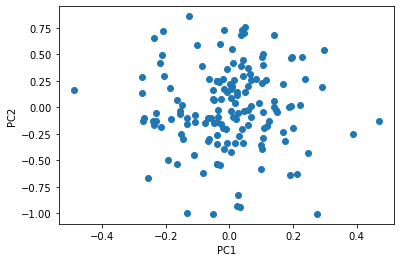

In [18]:
plt.scatter(iris_pca.X[:,0], iris_pca.X[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()